# 数据预览

In [124]:
import pandas as pd

file = 'file/truth_weibo.csv'

# df = pd.read_csv(file, error_bad_lines=False)
df = pd.read_csv(file)

print(df.columns)
print()
print(df.dtypes)

Index(['name', 'userCertify', 'userWeiboCount', 'userFollowCount',
       'userFanCount', 'forward', 'praise', 'Unnamed: 7'],
      dtype='object')

name                object
userCertify          int64
userWeiboCount      object
userFollowCount     object
userFanCount        object
forward             object
praise              object
Unnamed: 7         float64
dtype: object


/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
del df['Unnamed: 7']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154114 entries, 0 to 154113
Data columns (total 7 columns):
name               154114 non-null object
userCertify        154114 non-null int64
userWeiboCount     154114 non-null object
userFollowCount    154114 non-null object
userFanCount       154114 non-null object
forward            154064 non-null object
praise             154114 non-null object
dtypes: int64(1), object(6)
memory usage: 8.2+ MB


### 部分缺失值处理

In [126]:
df['userWeiboCount'] = df['userWeiboCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['userFollowCount'] = df['userFollowCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['userFanCount'] = df['userFanCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['praise'] = df['praise'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['forward'] = df['forward'].apply(lambda x : int(x) if x != 'None' and type(x) != float else 0).astype('int')

df.info()

# for i in range(len(df['forward'])):
#     try:
#         int(df['forward'][i])
#     except:
#         if df['forward'][i] != 'None':
#             print(df['forward'][i])
#             print(type(df['forward'][i]))
#             print
#             break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154114 entries, 0 to 154113
Data columns (total 7 columns):
name               154114 non-null object
userCertify        154114 non-null int64
userWeiboCount     154114 non-null int64
userFollowCount    154114 non-null int64
userFanCount       154114 non-null int64
forward            154114 non-null int64
praise             154114 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.2+ MB


In [127]:
df.head()

,name,userCertify,userWeiboCount,userFollowCount,userFanCount,forward,praise
0,曲阜123网,0,1243,1186,995,0,1
1,媒体人徐传强,1,6245,780,787,0,0
2,网易新闻临沂站,2,11318,167,482,0,0
3,第一视频,2,8991,710,1360000,3,1
4,中国警察网大案要案频道,2,7019,614,36007,0,2


In [128]:
# pd.set_option('precision', 3)
# pd.option_context('display.float_format', lambda x: '%.3f' % x)

df.describe()

,userCertify,userWeiboCount,userFollowCount,userFanCount,forward,praise
count,154114.000000,1.541140e+05,154114.000000,1.541140e+05,1.541140e+05,1.541140e+05
mean,1.052377,2.712565e+04,847.080551,2.373356e+06,2.189266e+02,3.768572e+02
std,0.914695,1.242013e+05,1151.372523,6.974617e+06,1.088807e+04,9.161994e+03
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1.594000e+03,186.000000,8.290000e+02,0.000000e+00,0.000000e+00
50%,1.000000,9.656500e+03,467.000000,5.404350e+04,0.000000e+00,2.000000e+00
75%,2.000000,3.799400e+04,1069.000000,1.020000e+06,7.000000e+00,1.400000e+01
max,2.000000,3.238033e+07,22112.000000,1.610900e+08,2.721798e+06,1.537993e+06


# 特征工程

In [129]:
# encoding:utf-8

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sns.set(style='whitegrid')
sns.set()
sz = (15,8)

## 用户认证情况

([<matplotlib.axis.XTick at 0x11a4ce828>,
 <a list of 3 Text xticklabel objects>)

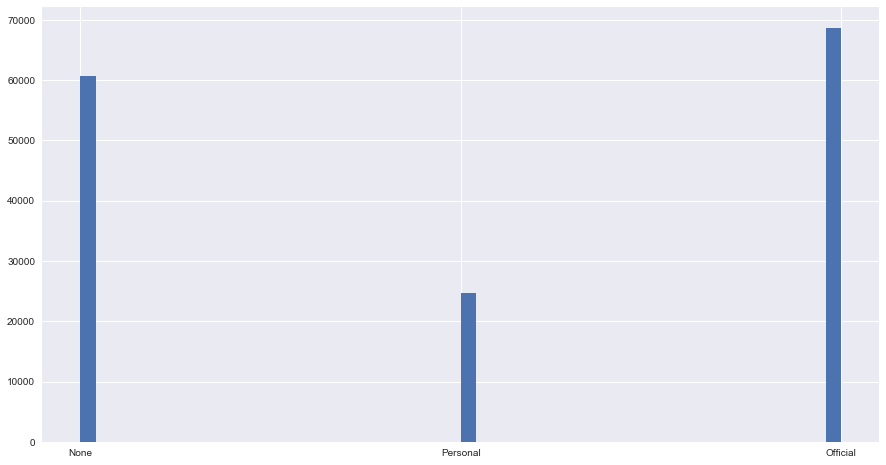

In [130]:
df['userCertify'].hist(figsize=sz, bins=50)
plt.xticks([0, 1, 2], ['None','Personal','Official'])

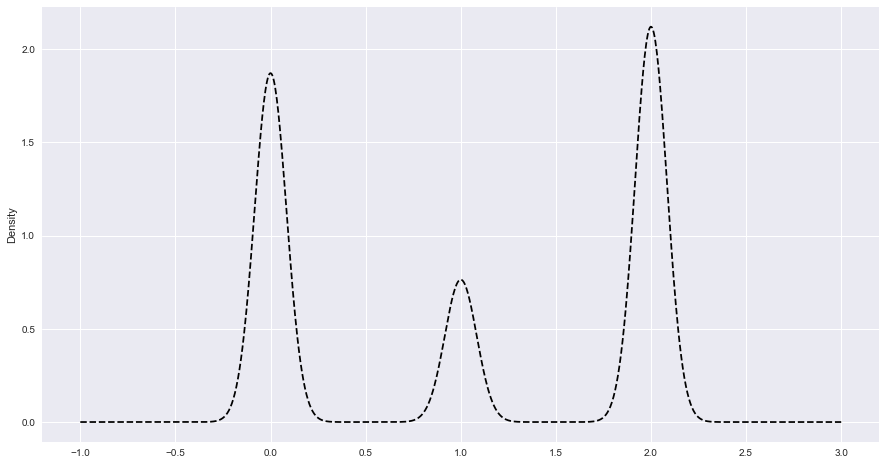

In [131]:
df['userCertify'].plot(figsize=sz, kind='kde', style='k--')

userCertify
0    60646
1    24750
2    68718
Name: name, dtype: int64


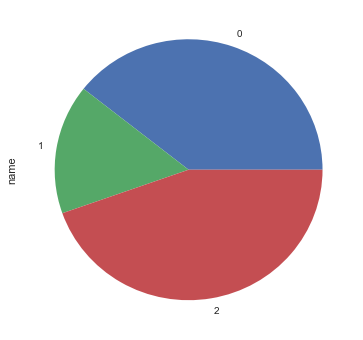

In [138]:
print(df.groupby('userCertify')['name'].count())
df.groupby('userCertify')['name'].count().plot.pie(figsize=(6, 6))

## 用户元属性：微博数、关注人数、粉丝数

### 微博数

27125.6481306


(0, 108502.59252241848)

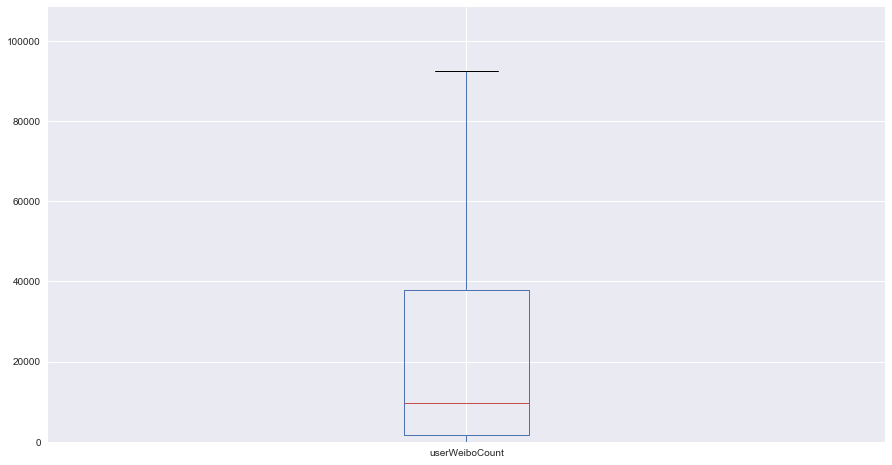

In [49]:
df['userWeiboCount'].plot.box(figsize=sz)
print(df['userWeiboCount'].mean())
plt.ylim([0, 4 * df['userWeiboCount'].mean()])

### 关注人数

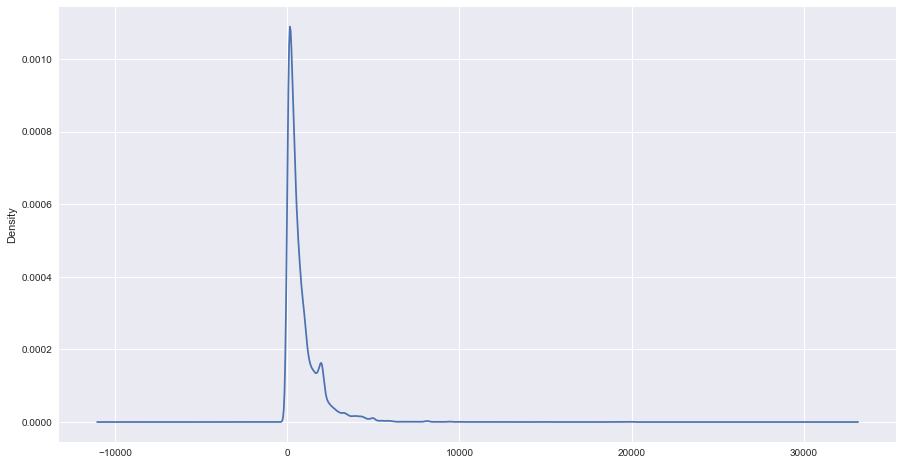

In [38]:
df['userFollowCount'].plot(figsize=sz, kind='kde')

847.080550761


(0, 2541.2416522833746)

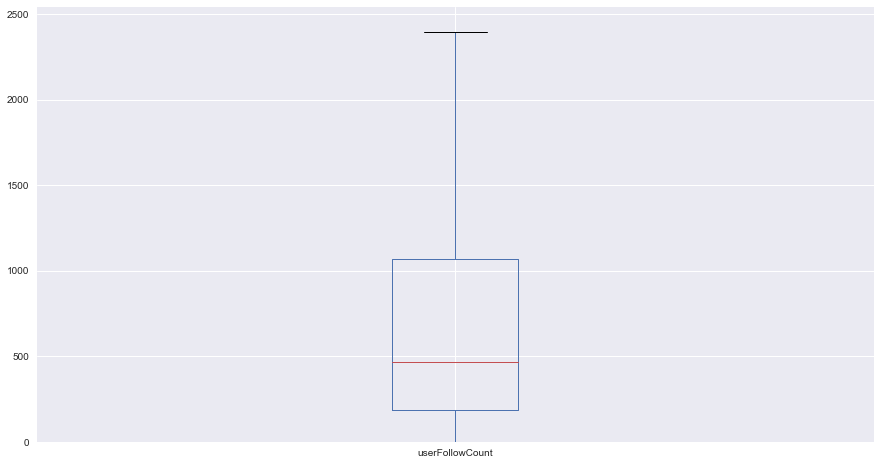

In [53]:
df['userFollowCount'].plot.box(figsize=sz)
print(df['userFollowCount'].mean())
plt.ylim([0, 3 * df['userFollowCount'].mean()])

### 粉丝数

2373355.70267


(0, 118667785.13340773)

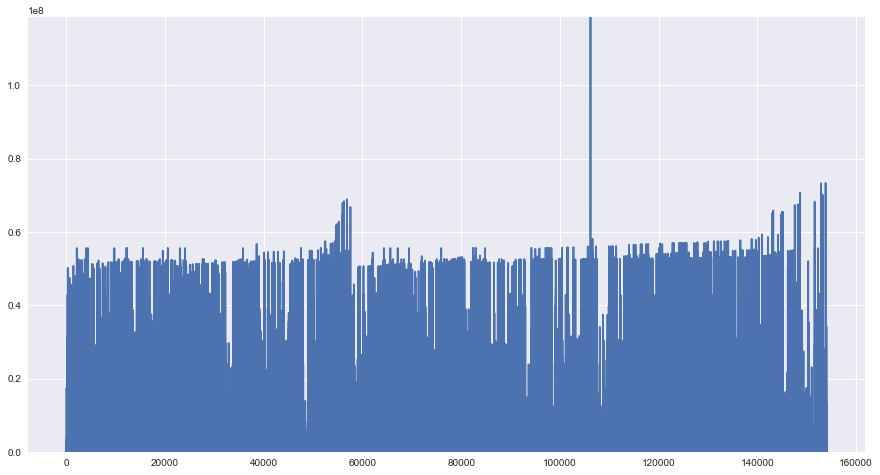

In [60]:
df['userFanCount'].plot(figsize=sz)
print(df['userFanCount'].mean())
plt.ylim([0, 50 * df['userFanCount'].mean()])

In [67]:
# df['userFanCount'].plot.box(figsize=sz)
# print(df['userFanCount'].mean())
# plt.ylim([0, 3 * df['userFanCount'].mean()])

## 传播属性：点赞量、转发量

218.92659979
376.857216087


(0, 11305.716482603788)

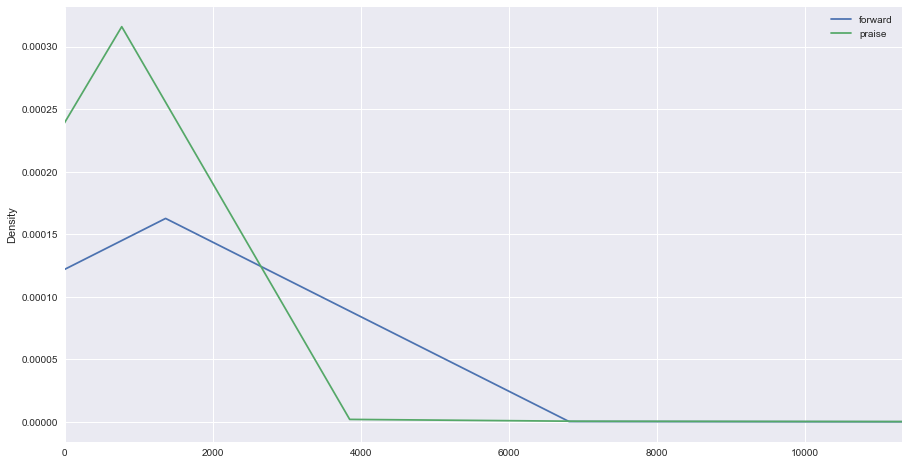

In [99]:
print(df['forward'].mean())
print(df['praise'].mean())
lim_mean = max(df['forward'].mean(), df['praise'].mean())
# df[['forward', 'praise']].plot(figsize=sz, kind='kde')
df[['forward', 'praise']].plot(figsize=sz, kind='kde')
plt.xlim([0, 30 * lim_mean])

## 是否认证 => 用户元属性的影响

### 微博数

27125.6481306


(0, 162753.88878362771)

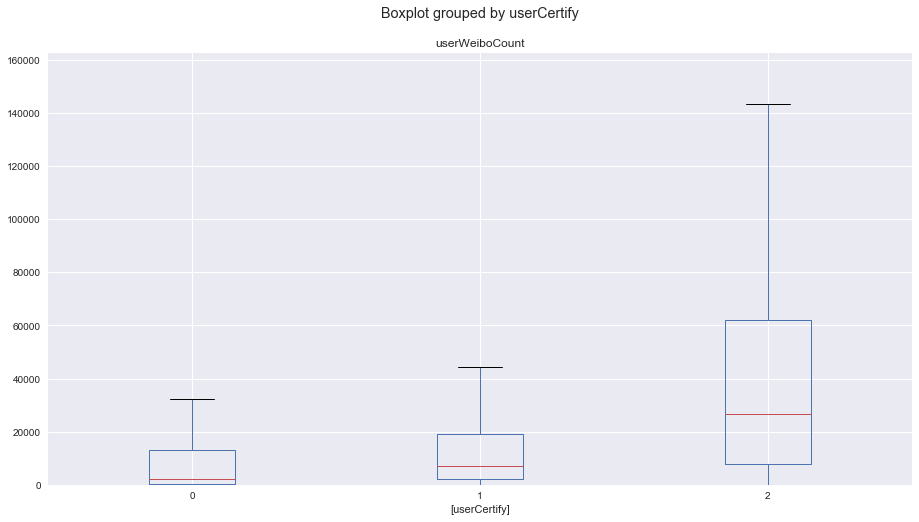

In [105]:
df[['userCertify', 'userWeiboCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userWeiboCount'].mean()
print(lim_mean)
plt.ylim([0, 6 * lim_mean])

### 关注人数

847.080550761


(0, 4235.4027538056243)

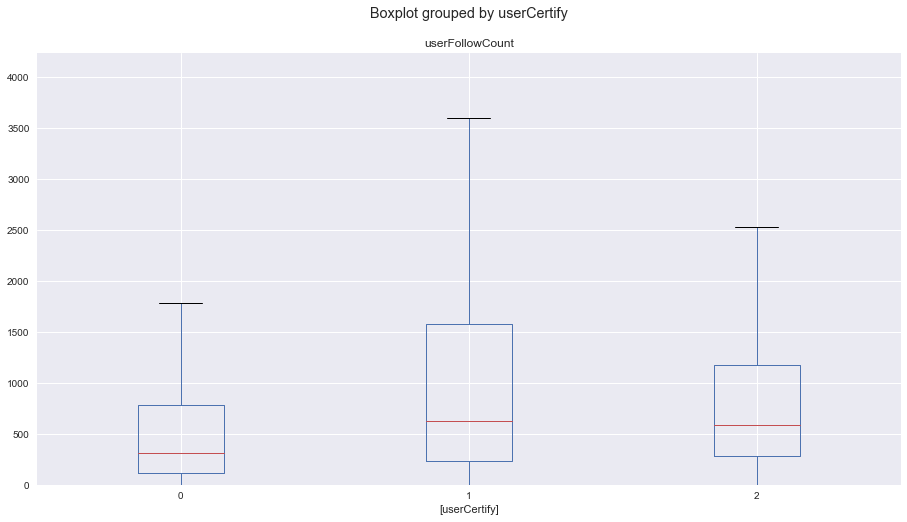

In [109]:
df[['userCertify', 'userFollowCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFollowCount'].mean()
print(lim_mean)
plt.ylim([0, 5 * lim_mean])

### 粉丝数

2373355.70267


(0, 11866778.513340773)

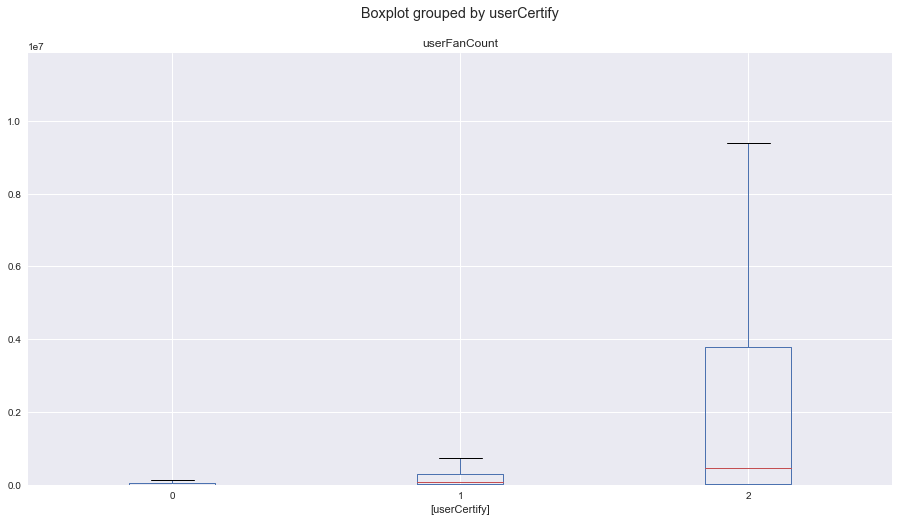

In [114]:
df[['userCertify', 'userFanCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFanCount'].mean()
print(lim_mean)
plt.ylim([0, 5 * lim_mean])

2373355.70267


(0, 712006.71080044634)

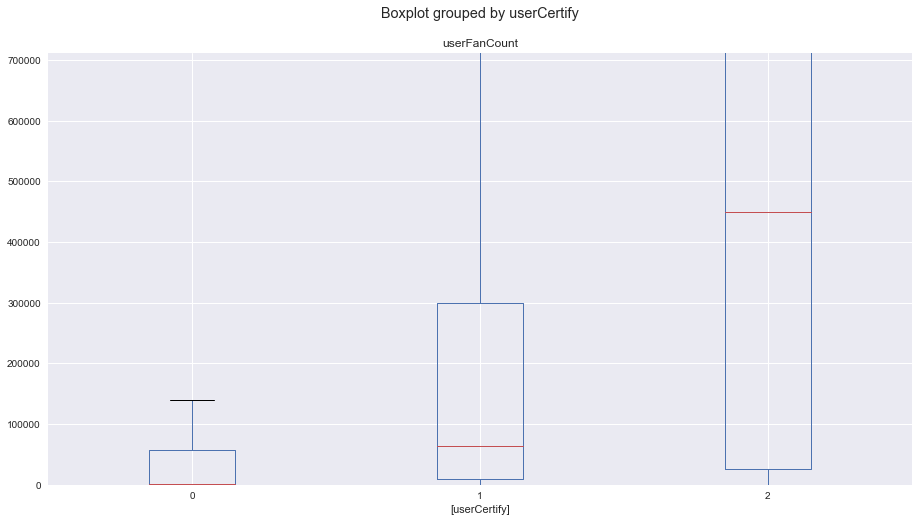

In [118]:
df[['userCertify', 'userFanCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFanCount'].mean()
print(lim_mean)
plt.ylim([0, 0.3 * lim_mean])

## 是否认证 => 传播属性的影响

376.857216087


(0, 75.371443217358589)

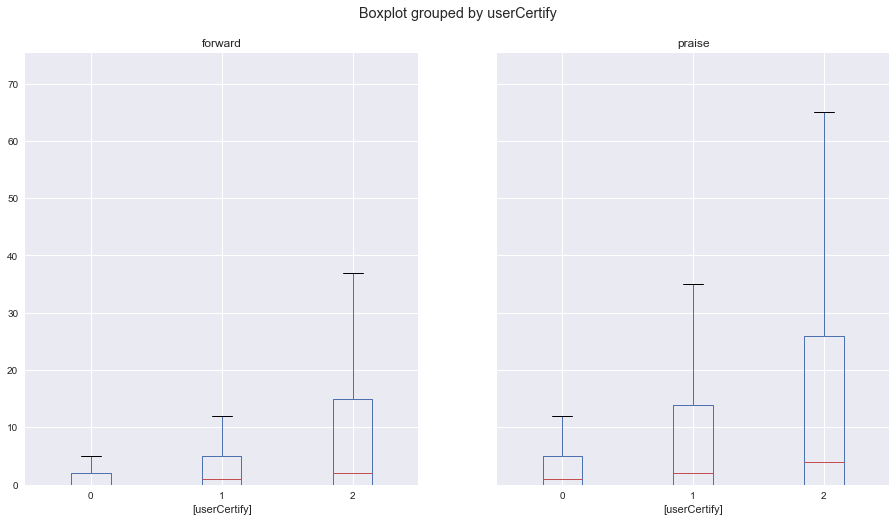

In [145]:
df[['userCertify', 'forward','praise']].boxplot(by='userCertify', figsize=sz)
lim_mean = max(df['forward'].mean(), df['praise'].mean())
print(lim_mean)
plt.ylim([0, 0.2 * lim_mean])